In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("survey lung cancer.csv")
df['LUNG_CANCER']=df['LUNG_CANCER'].replace('YES','1')

df['LUNG_CANCER']=df['LUNG_CANCER'].replace('NO','0')
df.head(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,1
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,1
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,1
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,0
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,1


In [4]:
df['GENDER']=df['GENDER'].map({'M':1,'F':0})
print(df['GENDER'])

0      1
1      1
2      0
3      1
4      0
      ..
304    0
305    1
306    1
307    1
308    1
Name: GENDER, Length: 309, dtype: int64


In [5]:
columns_to_drop = ['LUNG_CANCER']
x=df.drop(columns=columns_to_drop)
y=df['LUNG_CANCER']

In [6]:
print(y)
print(x)

0      1
1      1
2      0
3      0
4      0
      ..
304    1
305    1
306    1
307    1
308    1
Name: LUNG_CANCER, Length: 309, dtype: object
     GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0         1   69        1               2        2              1   
1         1   74        2               1        1              1   
2         0   59        1               1        1              2   
3         1   63        2               2        2              1   
4         0   63        1               2        1              1   
..      ...  ...      ...             ...      ...            ...   
304       0   56        1               1        1              2   
305       1   70        2               1        1              1   
306       1   58        2               1        1              1   
307       1   67        2               1        2              1   
308       1   62        1               1        1              2   

     CHRONIC DISEASE  FATI

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=1)

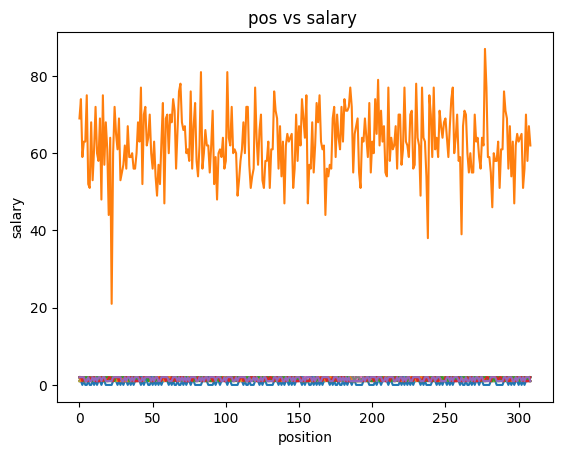

In [14]:
plt.plot(x)
plt.xlabel("position")
plt.ylabel("salary")
plt.title('pos vs salary ')
plt.show()

In [8]:
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

c:\Users\Sumresh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [9]:
prediction=classifier.predict(x_test)
prediction

array(['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0',
       '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1',
       '0', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1'], dtype=object)

In [10]:
print(y_test.shape)
y_pred=classifier.predict(x_test)
y_pred.shape

(62,)


(62,)

In [11]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test,prediction)
accuracy

0.8709677419354839